In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
import seaborn as sns

relation between quality and fixed acidity

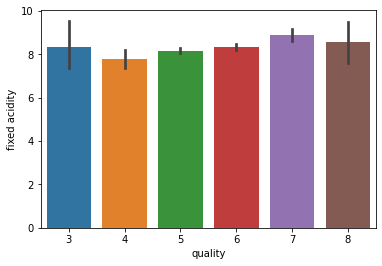

In [12]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

we can see that there is no much relationship between quality and fixed acidity

relation between quality and volatile acidity

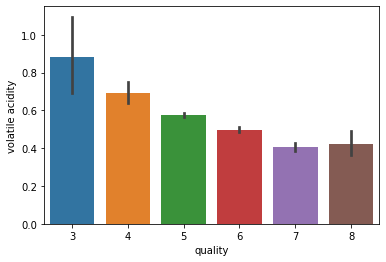

In [14]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

relation between quality and citric acid

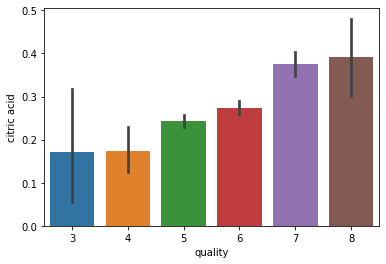

In [15]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

here we see that Composition of citric acid go higher as we go higher in the quality of the wine

relation between quality and residual sugar

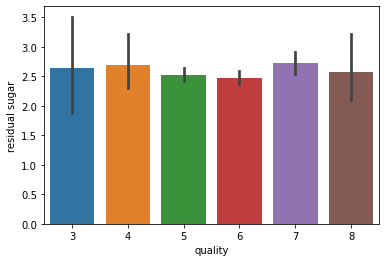

In [18]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

here we can see that there is no much relationship between quality and residual sugar

relation between quality and chlorides

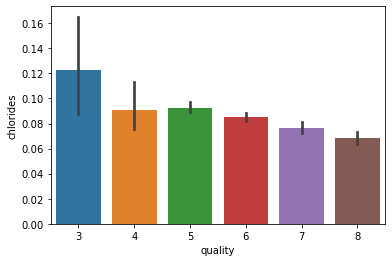

In [19]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)

here we can see that Composition of chloride also go down as we go higher in the quality of the wine

relation between quality and free sulfur dioxide

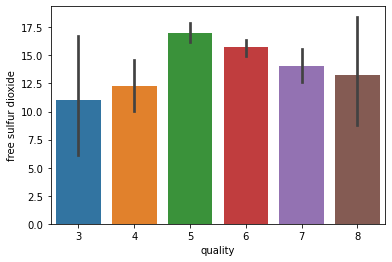

In [20]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

relation between quality and total sulfur dioxide

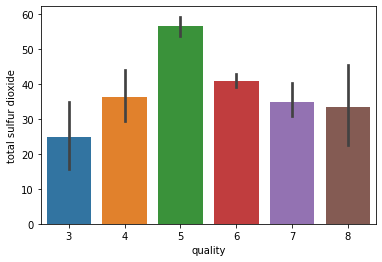

In [21]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

relation between quality and sulphates

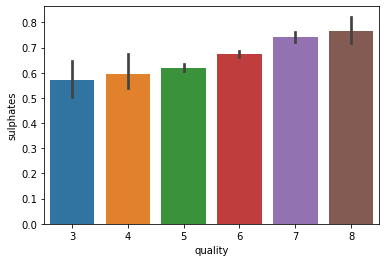

In [22]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)

here we can see that sulphates level goes higher with the quality of wine

relation between quality and alcohol

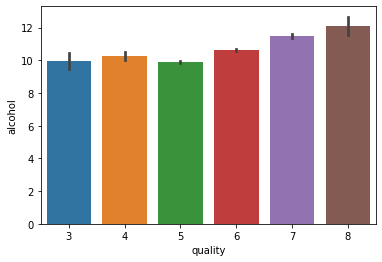

In [23]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)

here we can see that Alcohol level also goes higher as te quality of wine increases

preprocessing data because quality is in numerical variable we need it in categorical

In [24]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

now we are again converting quality of wine in numerical as 0 & 1

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
df["quality"] = label_encoder.fit_transform(df["quality"])

In [29]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [30]:
x = df.drop('quality',axis=1)

In [31]:
y = df['quality']

splitting the data into train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size  = 0.20)

Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [39]:
pred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       275
           1       0.74      0.56      0.63        45

    accuracy                           0.91       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



In [44]:
print(confusion_matrix(y_test, pred))

[[266   9]
 [ 20  25]]


In [45]:
import pickle

In [47]:
pickle.dump(model, open("model_classification.pkl", 'wb'))